In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
import seaborn
import pickle as pkl
import src.SessionNavigator as SessionNavigator
import src.SessionProcessor as SessionProcessor
from sklearn.svm import LinearSVC
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

C:\Users\Demogorgon\anaconda3\envs\Python37\lib\site-packages\allensdk\brain_observatory\comparison_utils.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Insert the file path to your data (e.g. "C:\Users\MickeyMouse\MouseBrainData\manifest.json")
data_root = "C:/Users/Demogorgon/Documents/College/Marcus/Boston University PhD/Ocker Lab"
manifest_path = f"{data_root}/AllenSDK_Data/manifest.json"
save_path = f"{data_root}/correlations_and_bursts/data"
bursts_path = f"{save_path}/"

# These are the same stim and session_id in the Burst Detection script
stim = 'drifting_gratings_contrast'
session_id = 778240327

In [3]:
# Create a SessionNavigator, which will open and navigate the data in manifest_path
navigator = SessionNavigator.SessionNavigator(manifest_path)

# Load the session, bursts, and single spikes
with open(f"{save_path}/{stim}__whole_burst_trains__session_{session_id}.pkl", 'rb') as f:
    bursts = pkl.load(f)
with open(f"{save_path}/{stim}__whole_single_trains__session_{session_id}.pkl", 'rb') as f:
    singles = pkl.load(f)

session = navigator.load_session(session_id)

In [4]:
# Open a processor, then add the bursts and single spikes
# (This cell can take a minute or two to load the session)
processor = SessionProcessor.SessionProcessor(session)
decoder_name = processor.construct_decoder(stim, "orientation", burst_dict=bursts, single_dict=singles)
print(decoder_name)

drifting_gratings_contrast__width_50.0ms__unshuffled


In [5]:
# Run the processor
# (This cell takes around a minute)
processor.construct_psth(decoder_name)
processor.calculate_decoder_weights(decoder_name)
processor.calculate_correlations(decoder_name)

In [6]:
# Organize all the data from the processor
results = processor.results()[decoder_name]
print(results.keys())

dict_keys(['decoder', 'psths', 'class_psths', 'cell_correlation_matrices', 'within_class_correlations'])


In [7]:
# Unpack the results
decoder = results["decoder"]
psths = results["psths"]
#class_psths = results["class_psths"] # The psths organized by stimulus condition
#cell_correlation_matrices = results["cell_correlation_matrices"]
#within_class_correlations = results["within_class_correlations"]

# Get plot-relevant data
bins = decoder.bin_edges
all_unit_ids = processor.all_units
stim_presentation_ids = decoder.stim_table.index.values

In [ ]:
psths["whole"]

<xarray.DataArray 'spike_counts' (stimulus_presentation_id: 540, time_relative_to_stimulus_onset: 11, unit_id: 784)>
array([[[ 0,  0,  0, ...,  2,  0,  0],
        [ 0,  0,  0, ...,  0,  4,  1],
        [ 0,  0,  0, ...,  0,  3,  1],
        ...,
        [ 0,  0,  0, ...,  1,  1,  0],
        [ 0,  0,  0, ...,  3,  4,  0],
        [ 0,  0,  0, ...,  1,  0,  0]],

       [[ 2,  0,  0, ...,  1,  2,  0],
        [ 0,  0,  0, ...,  0,  1,  0],
        [ 0,  0,  0, ...,  2, 13,  0],
        ...,
        [ 0,  0,  0, ...,  3,  4,  0],
        [ 1,  1,  1, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  1,  0,  0]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 4,  0,  0, ...,  2,  3,  0],
        ...,
        [ 0,  1,  1, ...,  0,  1,  0],
        [ 0,  0,  2, ...,  1,  1,  0],
        [ 2,  0,  0, ...,  0,  2,  0]],

       ...,

       [[ 0,  0,  0, ...,  2,  0,  0],
        [ 0,  0,  0, ...,  0,  1,  0],
        [ 0,  0,  0, ...,  1,  1,  0],
        ...,
        [ 0,  0,  0, ...,  2,  1,  0],
        [ 0,  0,  2, ...,  2,  2,  0],
        [ 0,  0,  0, ...,  1,  1,  0]],

       [[ 0,  0,  0, ...,  1,  0,  0],
        [ 0,  0,  1, ...,  1,  1,  0],
        [ 0,  0,  1, ...,  1,  0,  0],
        ...,
        [ 0,  0,  2, ...,  1,  0,  0],
        [ 0,  0,  0, ...,  1,  0,  0],
        [ 0,  0,  1, ...,  1,  1,  0]],

       [[ 0,  0,  0, ...,  1,  1,  0],
        [ 0,  0,  0, ...,  3,  1,  0],
        [ 0,  0,  0, ...,  3,  3,  0],
        ...,
        [ 0,  0,  2, ...,  2,  3,  0],
        [ 0,  0,  0, ...,  1,  0,  0],
        [ 0,  0,  2, ...,  1,  2,  1]]], dtype=uint16)
Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 3798 ... 4337
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 0.025 ... 0.525
  * unit_id                          (unit_id) int64 951015763 ... 951037645

In [ ]:
psths["singles"]

C:\Users\Demogorgon\anaconda3\envs\Python37\lib\site-packages\xarray\core\formatting.py:142: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif isinstance(x, (float, np.float)):


<xarray.DataArray 'single_spike_counts' (stimulus_presentation_id: 540, time_relative_to_stimulus_onset: 11, unit_id: 784)>
array([[[0, 0, 0, ..., 2, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 2, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 3798 ... 4337
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 0.025 ... 0.525
  * unit_id                          (unit_id) int64 951015763 ... 951037645

In [ ]:
session.presentationwise_spike_times(stimulus_presentation_ids=[4000, 4200], unit_ids=all_unit_ids)

,stimulus_presentation_id,unit_id,time_since_stimulus_presentation_onset
spike_time,,,
1838.767340,4000,951031834,0.000346
1838.767366,4000,951028439,0.000373
1838.767540,4000,951029392,0.000546
1838.767541,4000,951037577,0.000548
1838.767587,4000,951018637,0.000594
...,...,...,...
2039.433408,4200,951025353,0.499145
2039.433527,4200,951020244,0.499264
2039.433627,4200,951019474,0.499364


In [ ]:
processor.presentationwise_non_burst_times(decoder_name, stimulus_presentation_ids=[4000, 4200], unit_ids=all_unit_ids)

,absolute_spike_time,relative_spike_time,stimulus_presentation_id,unit_id
0,1838.767340,0.000346,4000,951031834
1,1838.767366,0.000373,4000,951028439
2,1838.767587,0.000594,4000,951018637
3,1838.767720,0.000727,4000,951019758
4,1838.767873,0.000880,4000,951031181
...,...,...,...,...
2016,2039.930831,0.996568,4200,951030028
2017,2039.931641,0.997378,4200,951025228
2018,2039.934298,1.000034,4200,951030570
2019,2039.934886,1.000623,4200,951016120


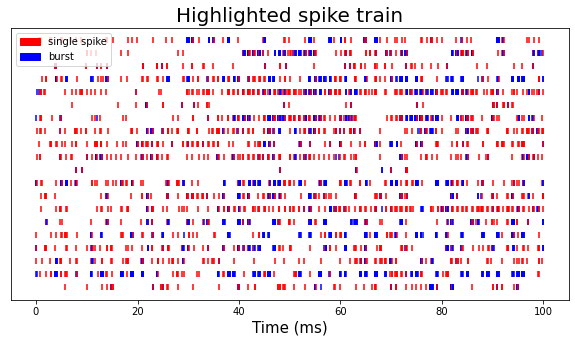

In [8]:
# Highlight bursts and non-bursts in a spike train
# Assign the plot attributes
MS_UPPER_THRESHOLD = 1800
MS_LOWER_THRESHOLD = 1700
TITLE_FONT_SIZE = 20
XY_LABEL_SIZE = 15
X_TICK_SIZE = 10
Y_TICK_SIZE = 10
LEGEND_SIZE = 10
SUPTITLE_SIZE = 25
SUPTITLE_WEIGHT = "bold"
LINEWIDTH = 3
#                                         x   y
matplotlib.rcParams["figure.figsize"] = (10, 5)
matplotlib.rcParams["figure.titlesize"] = SUPTITLE_SIZE
matplotlib.rcParams["figure.titleweight"] = SUPTITLE_WEIGHT
plt.rc('axes', titlesize=TITLE_FONT_SIZE)
plt.rc('axes', labelsize=XY_LABEL_SIZE)
plt.rc('xtick', labelsize=X_TICK_SIZE)
plt.rc('ytick', labelsize=Y_TICK_SIZE)
plt.rc('legend', fontsize=LEGEND_SIZE)


# First, we need the whole and separated spike trains
spike_times = session.presentationwise_spike_times(stimulus_presentation_ids=stim_presentation_ids, unit_ids=all_unit_ids)
burst_times = processor.presentationwise_burst_times(decoder_name, stimulus_presentation_ids=stim_presentation_ids, unit_ids=all_unit_ids)
single_times= processor.presentationwise_non_burst_times(decoder_name, stimulus_presentation_ids=stim_presentation_ids, unit_ids=all_unit_ids)
spike_times.reset_index(inplace=True)
burst_times.reset_index(inplace=True)
single_times.reset_index(inplace=True)

# Next, we need to select some cells that are very active, "average", and mostly inactive
units_by_whole_activity = spike_times.value_counts(["unit_id"], normalize=True, sort=True, ascending=True).to_frame()
units_by_burst_activity = burst_times.value_counts(["unit_id"], normalize=True, sort=True, ascending=True).to_frame()
units_by_single_activity=single_times.value_counts(["unit_id"], normalize=True, sort=True, ascending=True).to_frame()
units_by_whole_activity.reset_index(inplace=True)
units_by_burst_activity.reset_index(inplace=True)
units_by_single_activity.reset_index(inplace=True)

# Some units don't have bursts or singles. We only want to show cells that have both,
# so we drop the elements from whole_activity that aren't in burst_units or single_units
burst_units = units_by_burst_activity["unit_id"].to_numpy()
single_units = units_by_single_activity["unit_id"].to_numpy()
burst_mask = {"unit_id": burst_units}
single_mask= {"unit_id": single_units}

burst_unit_locations = units_by_whole_activity.isin(burst_units)["unit_id"]
trimmed_units_by_whole_activity = units_by_whole_activity.loc[burst_unit_locations]

single_unit_locations = units_by_whole_activity.isin(single_units)["unit_id"]
trimmed_units_by_whole_activity = trimmed_units_by_whole_activity.loc[single_unit_locations]

# Store unit id's for each unit that has bursts and singles
unit_ids = trimmed_units_by_whole_activity["unit_id"].to_list()
num_units = len(unit_ids)

# Get the indices for the upper, middle, and lower "quartiles" of activity
lower_quartile_idx = num_units//4
middle_quartile_idx = lower_quartile_idx*2
upper_quartile_idx = lower_quartile_idx*3

# Select 20 cells with moderate burst activity
example_cell_ids = units_by_burst_activity["unit_id"].iloc[middle_quartile_idx-10:middle_quartile_idx+10].to_numpy(dtype=int)
example_mask = {"unit_id": example_cell_ids}
example_bursts = burst_times[burst_times.isin(example_mask)["unit_id"]]
example_singles= single_times[single_times.isin(example_mask)["unit_id"]]
example_whole = spike_times[spike_times.isin(example_mask)["unit_id"]]

# Generate plotable spike trains
fig, ax = plt.subplots()
#color_maps = {}
height_count = 1
height_coeff = 0.1
for cell_id in example_cell_ids:
    # Pull the bursts and whole train for this particular cell
    current_bursts = example_bursts.loc[example_bursts["unit_id"]==cell_id]
    current_whole = example_whole.loc[example_whole["unit_id"]==cell_id]
    
    # Trim the spike train
    current_whole = current_whole.loc[current_whole["spike_time"] <= MS_UPPER_THRESHOLD]
    current_whole = current_whole.loc[current_whole["spike_time"] >= MS_LOWER_THRESHOLD]
    num_bursts = len(current_bursts)
    num_spikes = len(current_whole)
    
    # Initialize the color_map for the spikes: an array that holds which color each spike
    # in `current_whole` should be
    color_map = np.zeros(num_spikes, dtype=str)
    height = np.full(num_spikes, height_count*height_coeff)
    height_count += 1
    
    # Initialize burst ranges
    burst_beg = current_bursts["absolute_beg_time"].iat[0]
    burst_end = current_bursts["absolute_end_time"].iat[0]
    burst_idx = 1
    k = 0
    while k < num_spikes:
        current_spike = current_whole["spike_time"].iat[k]
        if current_spike >= burst_beg and current_spike < burst_end:
            # If the spike is inside the burst range, make it blue
            color_map[k] = "b"
        
        elif current_spike > burst_end and burst_idx < num_bursts:
            # If the spike occured after the end of the burst range, we need to check
            # if there are more bursts. If not, the `else` will be triggered
            burst_beg = current_bursts["absolute_beg_time"].iat[burst_idx]
            burst_end = current_bursts["absolute_end_time"].iat[burst_idx]
            burst_idx += 1
            k -= 1 # We don't want to index k, because we want to check the same spike again
        
        else:
            # If the spike wasn't in the burst range, then it must have been 
            # before the burst range, make it red
            color_map[k] = "r"

        k += 1
    #color_maps[cell_id] = color_map
    ax.scatter(current_whole["spike_time"].to_numpy() - MS_LOWER_THRESHOLD, height, c=color_map, marker="|")

ax.set_xlabel("Time (ms)")
ax.set_yticks([])
ax.set_title("Highlighted spike train")

# The patching gives more control over the legend
red_patch = mpatches.Patch(color='red', label='single spike')
blue_patch = mpatches.Patch(color='blue', label='burst')
plt.legend(handles=[red_patch, blue_patch], loc="upper left")
plt.show()

# Save the figure and axis to tile it later
highlighted_spike_train_fig = fig
highlighted_spike_train_ax  = ax

C:\Users\Demogorgon\anaconda3\envs\Python37\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


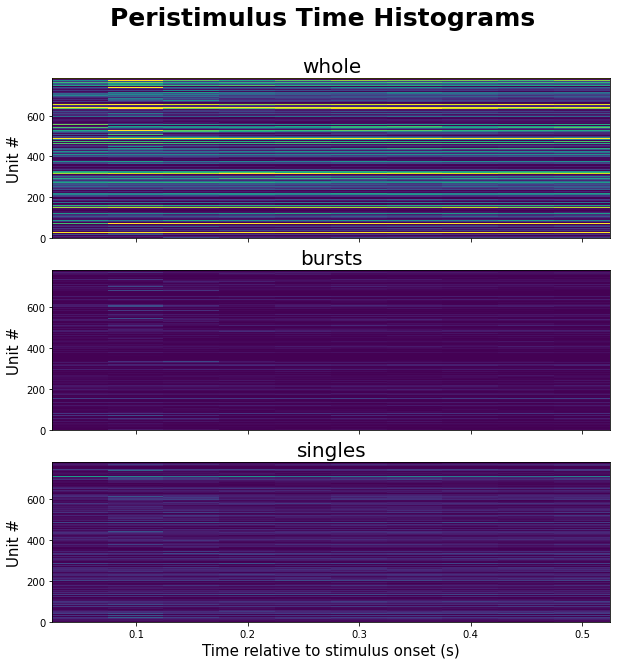

In [9]:
# Generate whole, burst, and single psths
#                                         x   y
matplotlib.rcParams["figure.figsize"] = (10, 10)

fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)
plot_count = 0
for spike_train_type, psth in psths.items():
    # Get the response averaged PSTH
    mean_psth = psth.mean(dim="stimulus_presentation_id") # Mean activity across trials
    
    # Generate the figure
    ax[plot_count].pcolormesh(
        mean_psth["time_relative_to_stimulus_onset"],
        np.arange(mean_psth["unit_id"].size),
        mean_psth.T,
        vmin=0,
        vmax=1
    ) # TODO: adjust the colors of burst and single counts to be 
    # similar to the whole train, then include a color bar for each plot
    ax[plot_count].set_title(spike_train_type)
    ax[plot_count].set_ylabel("Unit #")
    plot_count += 1

ax[plot_count-1].set_xlabel("Time relative to stimulus onset (s)")
fig.suptitle("Peristimulus Time Histograms")
plt.show()

# Save the figure and axis to tile it later
psth_fig = fig
psth_ax = ax

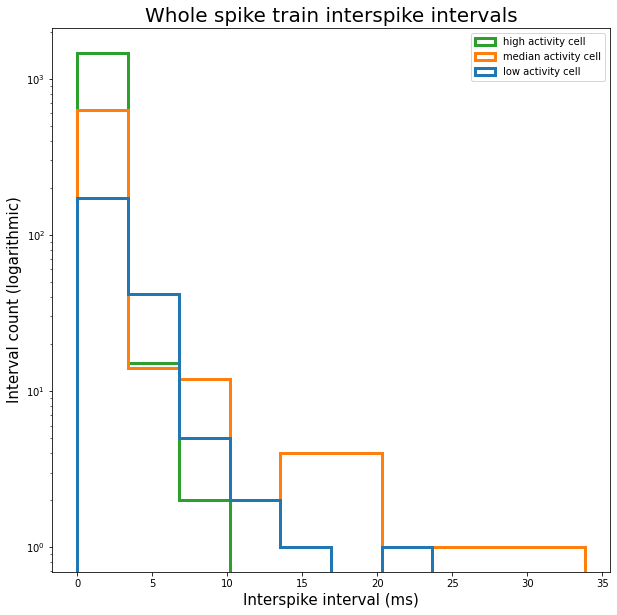

In [42]:
# ISI density plots (whole train)
#                                         x   y
matplotlib.rcParams["figure.figsize"] = (10, 10)

def generate_isi(spikes):
    # num_spikes - 1 is the number of interspike intervals
    num_isi = len(spikes) - 1
    isi = np.zeros(num_isi)
    for k in range(num_isi):
        isi[k] = spikes[k+1] - spikes[k]
    return isi

# Select 3 cells for isi plots (lower cells), one with low activity, 
# "average" activity (it's actually the median based on how I'm 
# selecting it), and high activity
example_whole_ids = [0]*3
example_whole_ids[0] = units_by_whole_activity["unit_id"].iat[lower_quartile_idx]
example_whole_ids[1] = units_by_whole_activity["unit_id"].iat[middle_quartile_idx]
example_whole_ids[2] = units_by_whole_activity["unit_id"].iat[upper_quartile_idx]
example_whole_mask = {"unit_id": example_whole_ids}
example_whole = spike_times[spike_times.isin(example_whole_mask)["unit_id"]]
example_whole.reset_index(inplace=True)
plot_labels = ["low activity cell", "median activity cell", "high activity cell"]

#fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)
example_isis = [[]]*3
plot_count = 0
for cell_id in example_whole_ids:
    example_spike_times = example_whole.loc[example_whole["unit_id"]==cell_id]
    example_spike_times = example_spike_times["spike_time"].to_numpy()
    example_isis[plot_count] = generate_isi(example_spike_times)
    plot_count += 1

fig, ax = plt.subplots()
ax.hist(example_isis, histtype="step", log=True, label=plot_labels, linewidth=LINEWIDTH)
ax.set_xlabel("Interspike interval (ms)")
ax.set_ylabel("Interval count (logarithmic)")
ax.set_title("Whole spike train interspike intervals")
ax.legend()
whole_spike_isi_fig = fig
whole_spike_isi_ax = ax
#plt.show()

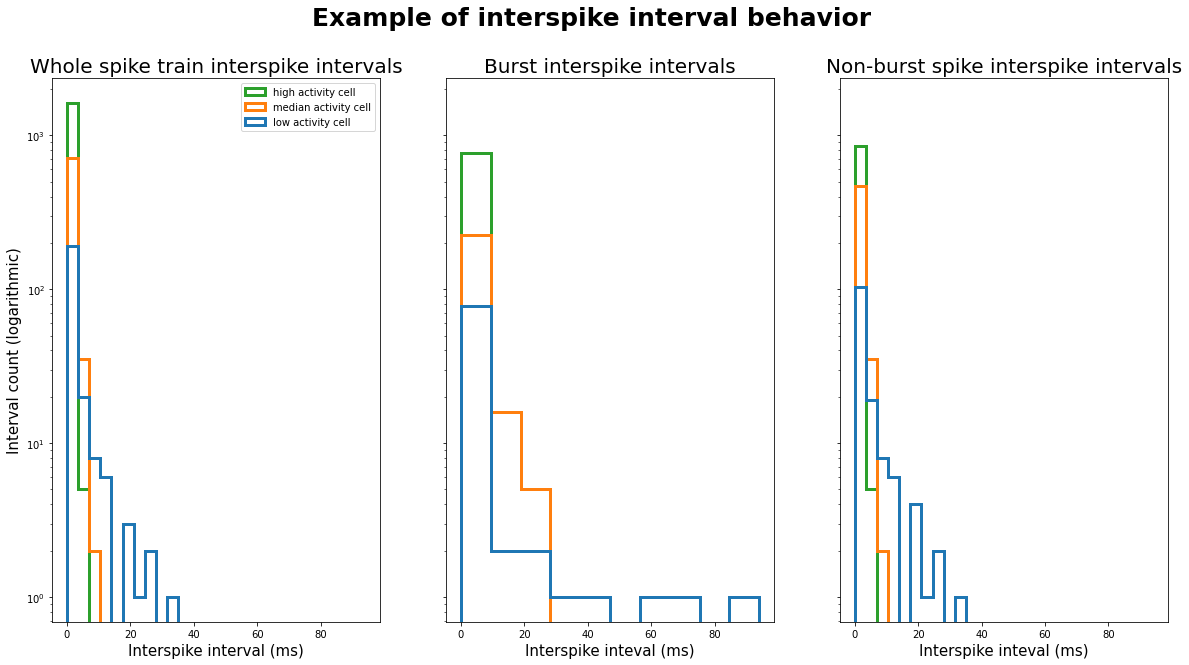

In [46]:
#                                         x   y
matplotlib.rcParams["figure.figsize"] = (20, 10)
example_burst_ids = [0]*3
example_burst_ids[0] = units_by_burst_activity["unit_id"].iat[lower_quartile_idx]
example_burst_ids[1] = units_by_burst_activity["unit_id"].iat[middle_quartile_idx]
example_burst_ids[2] = units_by_burst_activity["unit_id"].iat[upper_quartile_idx]
example_burst_mask = {"unit_id": example_burst_ids}
example_bursts = burst_times[burst_times.isin(example_burst_mask)["unit_id"]]
example_bursts.reset_index(inplace=True)
example_whole = spike_times[spike_times.isin(example_burst_mask)["unit_id"]]
example_whole.reset_index(inplace=True)

whole_isis = [[]]*3
burst_isis = [[]]*3
single_isis= [[]]*3
plot_count = 0
for cell_id in example_burst_ids:
    # Pull the bursts and whole train for this particular cell
    current_bursts = example_bursts.loc[example_bursts["unit_id"]==cell_id]
    current_whole = example_whole.loc[example_whole["unit_id"]==cell_id]
    num_bursts = len(current_bursts)
    num_spikes = len(current_whole)
    
    # Initialize the tag_map for the spikes: an array that indicates
    # whether each spike in `current_whole` is a burst or single
    tag_map = np.zeros(num_spikes, dtype=bool)
    
    # Initialize burst ranges
    burst_beg = current_bursts["absolute_beg_time"].iat[0]
    burst_end = current_bursts["absolute_end_time"].iat[0]
    burst_idx = 1
    k = 0
    while k < num_spikes:
        current_spike = current_whole["spike_time"].iat[k]
        if current_spike >= burst_beg and current_spike < burst_end:
            # If the spike is inside the burst range, make it a burst
            tag_map[k] = True
        
        elif current_spike > burst_end and burst_idx < num_bursts:
            # If the spike occured after the end of the burst range, we need to check
            # if there are more bursts. If not, the `else` will be triggered
            burst_beg = current_bursts["absolute_beg_time"].iat[burst_idx]
            burst_end = current_bursts["absolute_end_time"].iat[burst_idx]
            burst_idx += 1
            k -= 1 # We don't want to index k, because we want to check the same spike again
        
        else:
            # If the spike wasn't in the burst range, make it a single
            tag_map[k] = False

        k += 1
    
    isolated_bursts = current_whole.loc[tag_map]["spike_time"].to_numpy()
    isolated_singles= current_whole.loc[np.invert(tag_map)]["spike_time"].to_numpy()
    whole_isis[plot_count] = generate_isi(current_whole["spike_time"].to_numpy())
    burst_isis[plot_count] = generate_isi(isolated_bursts)
    single_isis[plot_count] = generate_isi(isolated_singles)
    
    plot_count += 1


fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)
ax[0].hist(whole_isis, histtype="step", log=True, label=plot_labels, linewidth=LINEWIDTH)
ax[0].set_xlabel("Interspike interval (ms)")
ax[0].set_ylabel("Interval count (logarithmic)")
ax[0].set_title("Whole spike train interspike intervals")
ax[0].legend()

ax[1].hist(burst_isis, histtype="step", log=True, linewidth=LINEWIDTH)#, label=plot_labels)
ax[1].set_xlabel("Interspike inteval (ms)")
ax[1].set_title("Burst interspike intervals")

ax[2].hist(single_isis, histtype="step", log=True, linewidth=LINEWIDTH)#, label=plot_labels)
ax[2].set_xlabel("Interspike inteval (ms)")
ax[2].set_title("Non-burst spike interspike intervals")
fig.suptitle("Example of interspike interval behavior")
plt.show()